<a href="https://colab.research.google.com/github/kaazima/Bank-Personal-Loan-Classification/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bank Personal Loan Classification

Universal bank is a small but growing bank. The majority of customers are liability, or deposit only customers, and the bank is interested in converting more of them into asset, or borrowing, customers. The bank has had past success with marketing campaigns to convert the liability customers to personal loan customers. With that success, the bank is interested in being more targeted with its efforts to ensure marketing dollars are spent on those most likely to convert. The bank would like a model to help it predict which new customers are likely to become personal loan customers to aid in this targeting.

## Business Question

Can we predict which new customers are most likely to say yes to a personal loan?

## Import Necessary packages

In [ ]:
import pandas as pd
from time import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Dataset Analysis

In [ ]:
bank_df = pd.read_csv('https://raw.githubusercontent.com/Nuthi-Sriram/Bank_Loan_Modelling/master/UniversalBank.csv')
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
# Drop columns that are not significant
bank_df = bank_df.drop(['ID', 'ZIP Code'], axis=1)
bank_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [ ]:
print('Shape:', bank_df.shape)

Shape: (5000, 12)


In [ ]:
bank_df['Personal Loan'].value_counts().rename_axis('Personal Loan').to_frame('No of customers')

,No of customers
Personal Loan,
0,4520
1,480


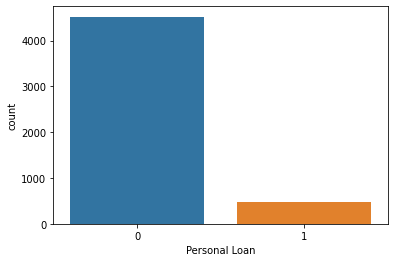

In [ ]:
sns.countplot(bank_df['Personal Loan'])



*   90.4% of the total customers take personal loan
*   9.6% of the total customers do not take personal loan
*   So, the dataset is skewed and we need to deal with this imbalanced dataset



## Split dataset into train & test

In [ ]:
feature = bank_df.copy().drop('Personal Loan', axis=1)
target = bank_df['Personal Loan']

In [ ]:
# Split the data into trainx, testx, trainy, testy with test_size = 0.20 using sklearn
x_train, x_test, y_train, y_test = train_test_split(feature, target, stratify=target, random_state=5, test_size=0.20)
# Scale data to obtain zero mean and unit variance
scaler = StandardScaler() 
x_train = scaler.fit_transform(x_train)  
x_test = scaler.transform(x_test)

In [ ]:
# Print the shape of x_train, x_test, y_train, y_test
print('Shape of x_train :', x_train.shape)
print('Shape of x_test  :', x_test.shape)
print('Shape of y_train :', y_train.shape)
print('Shape of y_test  :', y_test.shape)

Shape of x_train : (4000, 11)
Shape of x_test  : (1000, 11)
Shape of y_train : (4000,)
Shape of y_test  : (1000,)


## SVM

In [ ]:
# Create SVM object
svm = SVC()

In [ ]:
t = time()
# Train the model
svm.fit(x_train, y_train)
# Time is rounded to 3 decimal in seconds
print("Training time:", round(time()-t, 3), "s")

Training time: 0.12 s


In [ ]:
# Predict train data set
pred_train = svm.predict(x_train)
# Predict test data set
pred_test = svm.predict(x_test)

In [ ]:
print("Accuracy on train is:", accuracy_score(y_train, pred_train))
print("Accuracy on test is:", accuracy_score(y_test, pred_test))

Accuracy on train is: 0.98175
Accuracy on test is: 0.971


In [ ]:
# Checking performance of our model with classification report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       904
           1       0.95      0.74      0.83        96

    accuracy                           0.97      1000
   macro avg       0.96      0.87      0.91      1000
weighted avg       0.97      0.97      0.97      1000



In [ ]:
# Checking performance of our model with ROC Score
print('ROC Score:', roc_auc_score(y_test, pred_test))

ROC Score: 0.8675792772861357


In [ ]:
# list the default parameters of the model
svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## Hyper Parameter Tuning

In [ ]:
# List hyper parameters that we wish to tune
params = {'C': [0.01, 0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf', 'linear', 'poly'], 'degree': [3, 4]}
# Use grid search
grid = GridSearchCV(svm, verbose=1, param_grid=params, scoring='accuracy', cv=10, n_jobs=-1)

In [ ]:
# Train the model
grid.fit(x_train, y_train)
print()

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 306 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 806 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1210 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1660 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 25.5min finished


In [ ]:
print('Best Score:', grid.best_score_)
print('Best Parameters:', grid.best_params_)

Best Score: 0.98225
Best Parameters: {'C': 1000, 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
best_svm = grid.best_estimator_
# print best hyper parameters
print(best_svm)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
t = time()
# Train the model
best_svm.fit(x_train, y_train)
# Time is rounded to 3 decimal in seconds
print("Training time:", round(time()-t, 3), "s")

Training time: 0.204 s


In [ ]:
# Predict train data set
pred_train = best_svm.predict(x_train)
# Predict test data set
pred_test = best_svm.predict(x_test)

In [ ]:
print("Accuracy on train is:", accuracy_score(y_train, pred_train))
print("Accuracy on test is:", accuracy_score(y_test, pred_test))

Accuracy on train is: 0.99125
Accuracy on test is: 0.976


#### Confusion matrix for Train data

In [ ]:
# Print confusion matrix for train data
print(confusion_matrix(y_train, pred_train))

[[3609    7]
 [  28  356]]


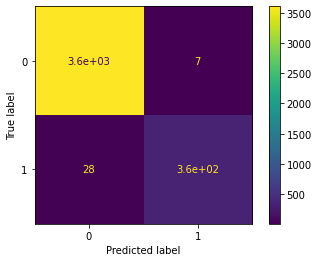

In [ ]:
# Plot confusion matrix for train data
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, pred_train), display_labels=grid.classes_).plot()

#### Confusion matrix for Test data

In [ ]:
# Print confusion matrix for test data
print(confusion_matrix(y_test, pred_test))

[[898   6]
 [ 18  78]]


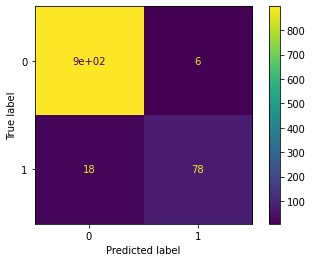

In [ ]:
# Plot confusion matrix for test data
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, pred_test), display_labels=grid.classes_).plot()

#### Performance of our model

In [ ]:
# Checking performance of our model with classification report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       904
           1       0.93      0.81      0.87        96

    accuracy                           0.98      1000
   macro avg       0.95      0.90      0.93      1000
weighted avg       0.98      0.98      0.98      1000



In [ ]:
# Checking performance of our model with ROC Score
print('ROC Score:', roc_auc_score(y_test, pred_test))

ROC Score: 0.9029314159292036


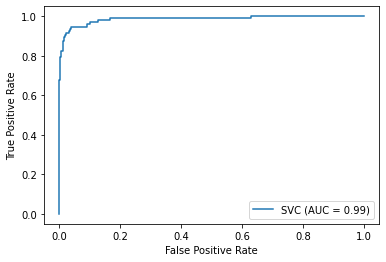

In [ ]:
# Plot ROC Curve
plot_roc_curve(best_svm, x_test, y_test)

## Overall Analysis



*   This is an imbalanced dataset. So, I have used stratify parameter to preserve the proportion of target as in original dataset, in the train and test datasets as well. Also, I have preprocessed data using StandardScaler to obtain 0 mean and unit variance. Doing this improved the accuracy and ROC score of the model.

*   As per the results, accuracy is 0.98. But, it can be observed that our dataset is skewed. So, instead of considering accuracy as our metric, we need to consider ROC_AUC score for highly skewed datasets.

*   For example, though the accuracy with default parameters is 0.97, there is a huge difference between recall of class 0 and class 1. After hyperparameter tuning, there is no much difference between the recalls of 2 classes, which is an improvement in the performance of the model.

*   I tried upsampling the dataset and then trained the model. But, the accuarcy fell to 0.96 and ROC score fell to 0.83. So, I trained the final model without upsampling the data.

*   Among KNN, Logistic Regression, Naive Bayes, and SVM:
SVM has the highest accuracy as well as ROC score.

